In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)

# ETS models

The ETS models are a family of time series models with an underlying state space model consisting of a level component, a trend component (T), a seasonal component (S), and an error term (E).

This notebook gives a very brief introduction to these models and shows how they can be used with statsmodels. For a more thorough treatment we refer to [1], chapter 8 (free online resource), on which the implementation in statsmodels and the examples used in this notebook are based.

[1] Hyndman, Rob J., and George Athanasopoulos. *Forecasting: principles and practice*, 3rd edition, OTexts, 2019. https://www.otexts.org/fpp3/7 

## Simple exponential smoothing

The simplest of the ETS models is also known as *simple exponential smoothing*. In ETS terms, it corresponds to the (A, N, N) model, that is, a model with additive errors, no trend, and no seasonality. The state space formulation of Holt's method is:

\begin{align}
y_{t} &= y_{t-1} + e_t\\
l_{t} &= l_{t-1} + \alpha e_t\\
\end{align}

This state space formulation can be turned into a different formulation, a forecast and a smoothing equation (as can be done with all ETS models):

\begin{align}
\hat{y}_{t|t-1} &= l_{t-1}\\
l_{t} &= \alpha y_{t-1} + (1 - \alpha) l_{t-1}
\end{align}

Here, $\hat{y}_{t|t-1}$ is the forecast/expectation of $y_t$ given the information of the previous step. In the simple exponential smoothing model, the forecast corresponds to the previous level. The second equation (smoothing equation) calculates the next level as weighted average of the previous level and the previous observation.

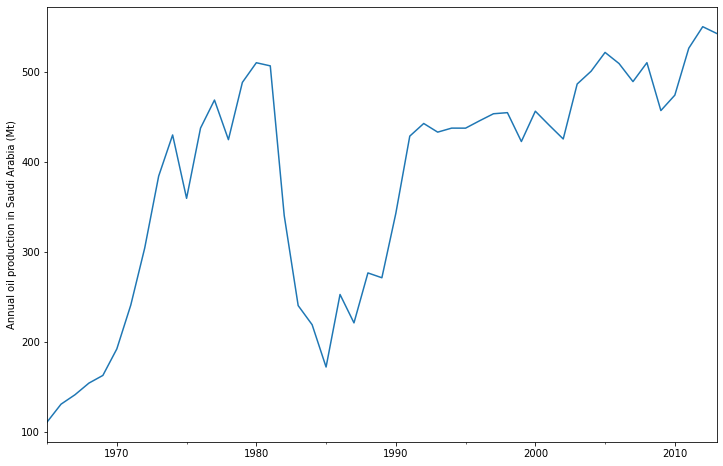

In [3]:
oildata = [
    111.0091, 130.8284, 141.2871, 154.2278,
    162.7409, 192.1665, 240.7997, 304.2174,
    384.0046, 429.6622, 359.3169, 437.2519,
    468.4008, 424.4353, 487.9794, 509.8284,
    506.3473, 340.1842, 240.2589, 219.0328,
    172.0747, 252.5901, 221.0711, 276.5188,
    271.1480, 342.6186, 428.3558, 442.3946,
    432.7851, 437.2497, 437.2092, 445.3641,
    453.1950, 454.4096, 422.3789, 456.0371,
    440.3866, 425.1944, 486.2052, 500.4291,
    521.2759, 508.9476, 488.8889, 509.8706,
    456.7229, 473.8166, 525.9509, 549.8338,
    542.3405
]
oil = pd.Series(oildata, index=pd.date_range('1965', '2013', freq='AS'))
oil.plot()
plt.ylabel("Annual oil production in Saudi Arabia (Mt)");

The plot above shows annual oil production in Saudia Arabia in million tonnes. The data are taken from the R package `fpp2` (companion package to prior version [1]).
Below you can see how to fit a simple exponential smoothing model using statsmodel's ETS implementation to this data. Additionally, the fit using `forecast` in R is shown as comparison.

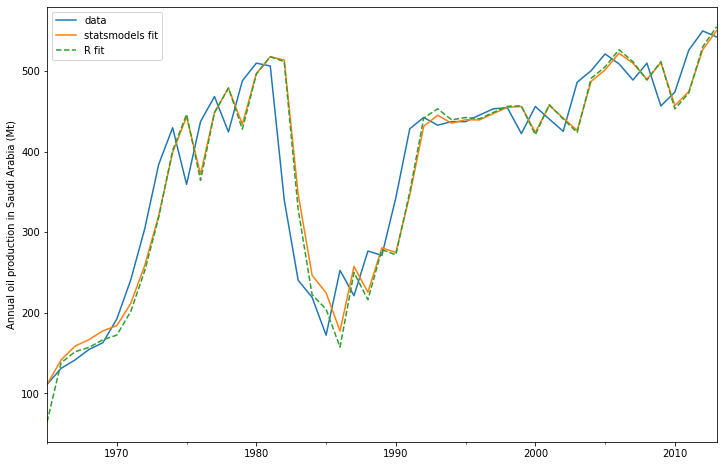

In [15]:
model = ETSModel(oil, error='add', trend='add', damped_trend=True)
fit = model.fit(maxiter=10000)
oil.plot(label='data')
fit.fittedvalues.plot(label='statsmodels fit')
plt.ylabel("Annual oil production in Saudi Arabia (Mt)");

# obtained from R
params_R = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
yhat = model.smooth(params_R).fittedvalues
yhat.plot(label='R fit', linestyle='--')

plt.legend();

By default the initial states are considered to be fitting parameters and are estimated by maximizing log-likelihood. Additionally it is possible to only use a heuristic for the initial values. In this case this leads to better agreement with the R implementation.

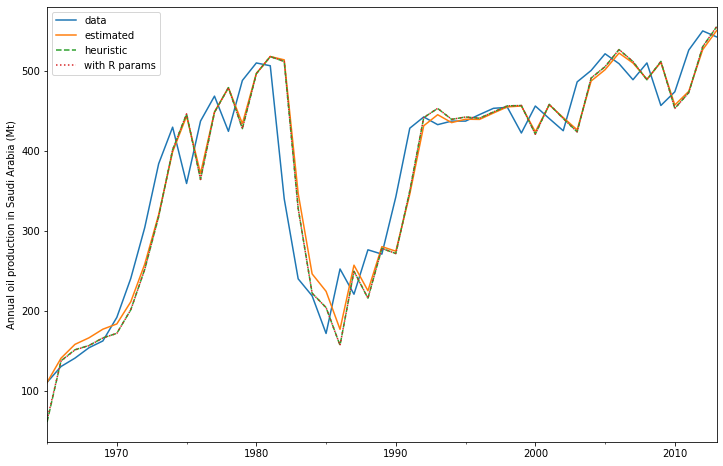

In [5]:
model_heuristic = ETSModel(oil, error='add', trend='add', damped_trend=True,
                          initialization_method='heuristic')
fit_heuristic = model_heuristic.fit()
oil.plot(label='data')
fit.fittedvalues.plot(label='estimated')
fit_heuristic.fittedvalues.plot(label='heuristic', linestyle='--')
plt.ylabel("Annual oil production in Saudi Arabia (Mt)");

# obtained from R
params = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
yhat = model.smooth(params).fittedvalues
yhat.plot(label='with R params', linestyle=':')

plt.legend();

In [6]:
fit.summary()

/home/samuel/Documents/OpenSource/statsmodels/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   49
Model:                      ETS(AAdN)   Log Likelihood                -258.003
Date:                Sun, 07 Jun 2020   AIC                            526.005
Time:                        19:42:44   BIC                            535.465
Sample:                    01-01-1965   HQIC                           529.594
                         - 01-01-2013                                         
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     1.0000      0.136      7.349      0.000       0.733       1.267
smoothing_trend      1e-05        nan        nan        nan         nan         nan
damping_trend       0.9156      0.057     16.115      0.000       0.804       1.027
initial_level      78.0300     52.680      1.481      0.139     -25.220     181.280
initial_trend      36.0141     27.535      1.308      0.191     -17.953      89.981
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [7]:
fit_heuristic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   49
Model:                      ETS(AAdN)   Log Likelihood                -258.880
Date:                Sun, 07 Jun 2020   AIC                            523.760
Time:                        19:42:44   BIC                            529.436
Sample:                    01-01-1965   HQIC                           525.913
                         - 01-01-2013                                         
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     1.0000      0.097     10.281      0.000       0.809       1.191
smoothing_trend     0.1182        nan        nan        nan         nan         nan
damping_trend       0.8000        nan        nan        nan         nan         nan
==============================================
              initialization method: heuristic
----------------------------------------------
initial_level                          33.6309
initial_trend                          34.8115
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

## Holt-Winters' seasonal method

The exponential smoothing method can be modified to incorporate a trend and a seasonal component. In the additive Holt-Winters' method, the seasonal component is added to the rest. This model corresponds to the ETS(A, A, A) model, and has the following state space formulation:

\begin{align}
y_t &= l_{t-1} + b_{t-1} + s_{t-m} + e_t\\
l_{t} &= l_{t-1} + b_{t-1} + \alpha e_t\\
b_{t} &= b_{t-1} + \beta e_t\\
s_{t} &= s_{t-m} + \gamma e_t
\end{align}



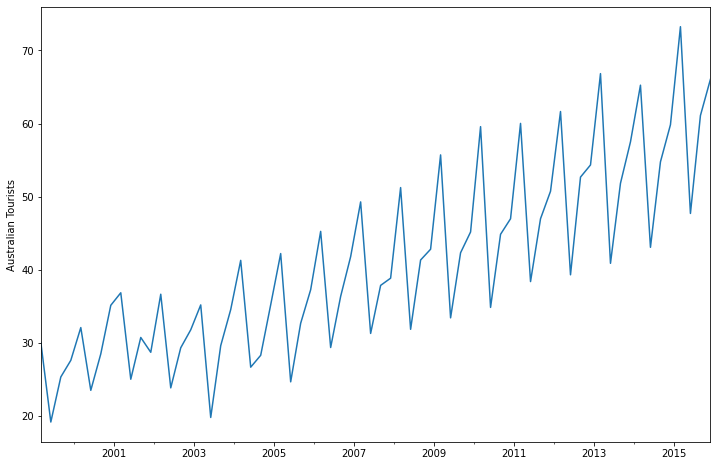

In [8]:
austourists_data = [
    30.05251300, 19.14849600, 25.31769200, 27.59143700,
    32.07645600, 23.48796100, 28.47594000, 35.12375300, 
    36.83848500, 25.00701700, 30.72223000, 28.69375900, 
    36.64098600, 23.82460900, 29.31168300, 31.77030900,
    35.17787700, 19.77524400, 29.60175000, 34.53884200,
    41.27359900, 26.65586200, 28.27985900, 35.19115300,
    42.20566386, 24.64917133, 32.66733514, 37.25735401,
    45.24246027, 29.35048127, 36.34420728, 41.78208136,
    49.27659843, 31.27540139, 37.85062549, 38.83704413,
    51.23690034, 31.83855162, 41.32342126, 42.79900337,
    55.70835836, 33.40714492, 42.31663797, 45.15712257,
    59.57607996, 34.83733016, 44.84168072, 46.97124960,
    60.01903094, 38.37117851, 46.97586413, 50.73379646,
    61.64687319, 39.29956937, 52.67120908, 54.33231689,
    66.83435838, 40.87118847, 51.82853579, 57.49190993,
    65.25146985, 43.06120822, 54.76075713, 59.83447494,
    73.25702747, 47.69662373, 61.09776802, 66.05576122,
]
index = pd.date_range("1999-03-01", "2015-12-01", freq="3MS")
austourists = pd.Series(austourists_data, index=index)
austourists.plot()
plt.ylabel('Australian Tourists');

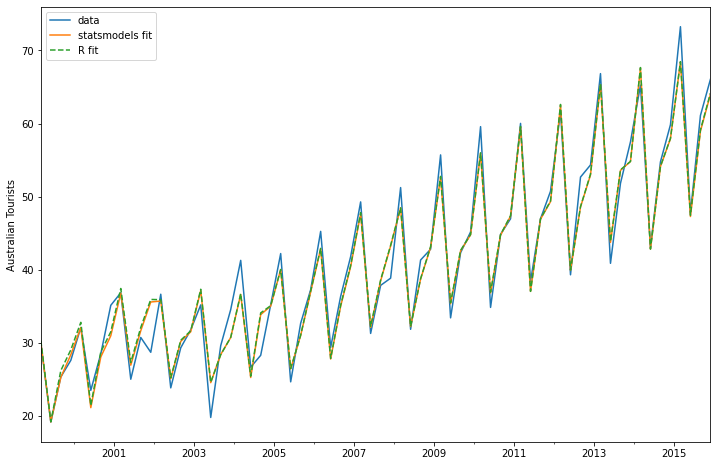

In [16]:
# fit in statsmodels
model = ETSModel(austourists, error="add", trend="add", seasonal="add",
                damped_trend=True, seasonal_periods=4)
fit = model.fit()

# fit with R params
params_R = [
    0.35445427, 0.03200749, 0.39993387, 0.97999997, 24.01278357, 
    0.97770147, 1.76951063, -0.50735902, -6.61171798, 5.34956637
]
fit_R = model.smooth(params_R)

austourists.plot(label='data')
plt.ylabel('Australian Tourists')

fit.fittedvalues.plot(label='statsmodels fit')
fit_R.fittedvalues.plot(label='R fit', linestyle='--')
plt.legend();

In [17]:
fit.summary()

/home/samuel/Documents/OpenSource/statsmodels/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   68
Model:                      ETS(AAdA)   Log Likelihood                -152.627
Date:                Sun, 07 Jun 2020   AIC                            325.254
Time:                        19:45:10   BIC                            347.449
Sample:                    03-01-1999   HQIC                           334.048
                         - 12-01-2015                                         
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.3398      0.111      3.070      0.002       0.123       0.557
smoothing_trend        0.0259      0.008      3.157      0.002       0.010       0.042
smoothing_seasonal     0.4011      0.080      5.041      0.000       0.245       0.557
damping_trend          0.9800        nan        nan        nan         nan         nan
initial_level         24.6362        nan        nan        nan         nan         nan
initial_trend          0.6148      0.392      1.568      0.117      -0.154       1.383
initial_seasonal.0     1.3700        nan        nan        nan         nan         nan
initial_seasonal.1    -1.1431        nan        nan        nan         nan         nan
initial_seasonal.2    -6.6725        nan        nan        nan         nan         nan
initial_seasonal.3     4.8117        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [18]:
fit._rank

10